In [12]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import requests
import io
import re
import numpy as np
import visJS_module

ModuleNotFoundError: No module named 'visJS_module'

In [3]:
data_folder = "https://github.com/PLombardo811/baseballdatabank/blob/master/upstream/"
Team_url = data_folder + "Teams.csv?raw=true"
Team_content = requests.get(Team_url).content
Team_csv = pd.read_csv(io.StringIO(Team_content.decode('utf-8')))

In [4]:
print(Team_csv.head())

   yearID lgID teamID franchID divID  Rank  Ghome DivWin WCWin LgWin WSWin  \
0    1871  NaN    BS1      BNA   NaN     3    NaN    NaN   NaN     N   NaN   
1    1871  NaN    CH1      CNA   NaN     2    NaN    NaN   NaN     N   NaN   
2    1871  NaN    CL1      CFC   NaN     8    NaN    NaN   NaN     N   NaN   
3    1871  NaN    FW1      KEK   NaN     7    NaN    NaN   NaN     N   NaN   
4    1871  NaN    NY2      NNA   NaN     5    NaN    NaN   NaN     N   NaN   

                      name                          park  attendance  BPF  \
0     Boston Red Stockings           South End Grounds I         NaN  103   
1  Chicago White Stockings       Union Base-Ball Grounds         NaN  104   
2   Cleveland Forest Citys  National Association Grounds         NaN   96   
3     Fort Wayne Kekiongas                Hamilton Field         NaN  101   
4         New York Mutuals      Union Grounds (Brooklyn)         NaN   90   

   PPF teamIDBR teamIDlahman45 teamIDretro  
0   98      BOS        

In [5]:
Team_csv = Team_csv[Team_csv['lgID'].notnull()]
Team_csv["yearID"] = Team_csv["yearID"].apply(str)

In [6]:
print(Team_csv.head())

   yearID lgID teamID franchID divID  Rank  Ghome DivWin WCWin LgWin WSWin  \
50   1876   NL    BSN      ATL   NaN     4    NaN    NaN   NaN     N   NaN   
51   1876   NL    CHN      CHC   NaN     1    NaN    NaN   NaN     Y   NaN   
52   1876   NL    CN1      CNR   NaN     8    NaN    NaN   NaN     N   NaN   
53   1876   NL    HAR      HAR   NaN     2    NaN    NaN   NaN     N   NaN   
54   1876   NL    LS1      LGR   NaN     5    NaN    NaN   NaN     N   NaN   

                       name                        park  attendance  BPF  PPF  \
50          Boston Red Caps         South End Grounds I         NaN  102   98   
51  Chicago White Stockings         23rd Street Grounds         NaN  112  106   
52          Cincinnati Reds              Avenue Grounds         NaN   86   95   
53      Hartford Dark Blues  Hartford Ball Club Grounds         NaN  110  106   
54         Louisville Grays    Louisville Baseball Park         NaN  117  117   

   teamIDBR teamIDlahman45 teamIDretro  
50 

In [7]:
Team_pairs = Team_csv[["yearID", "franchID"]].copy()

#Team_pairs["edges"] = Team_pairs.apply(lambda x: [(x["yearID"], y) for y in x["franchID"]], axis=1)
Team_pairs["edges"] = Team_pairs.apply(lambda x: (x["yearID"], x["franchID"]), axis=1)

In [8]:
G = nx.DiGraph()
G.add_edges_from(Team_pairs["edges"].tolist())
G.add_nodes_from(Team_csv["yearID"].tolist()+Team_csv["yearID"].tolist())

In [9]:
pos = nx.spring_layout(G,k=1.55,iterations=80)

In [10]:
offset=0
pos_labels = {}
keys = pos.keys()
for key in keys:
    x, y = pos[key]
    pos_labels[key] = (x, y+offset)

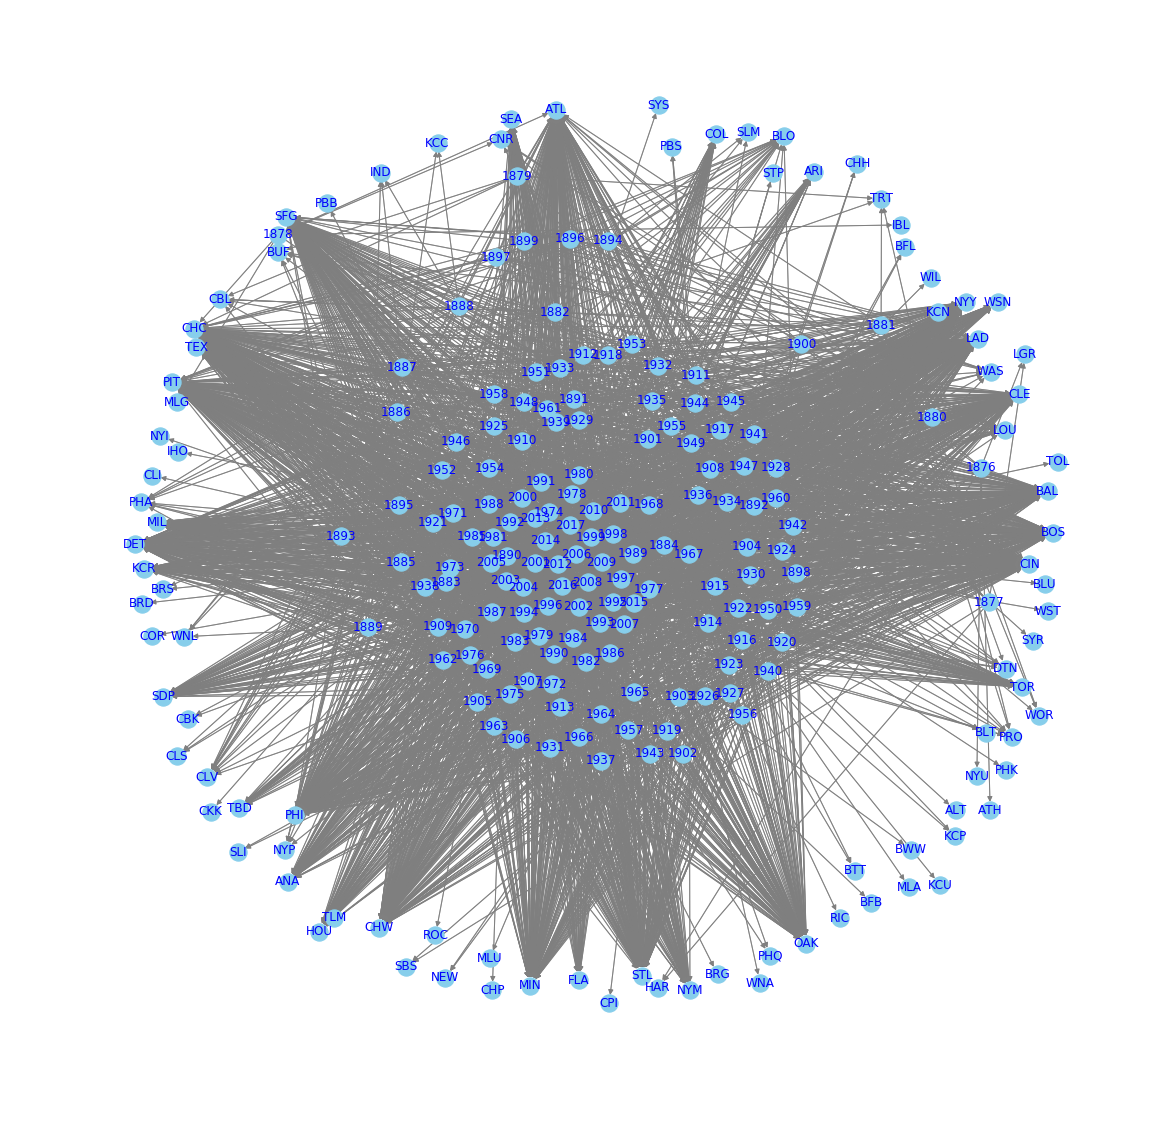

In [18]:
plt.figure(figsize=(20,20))
nx.draw_networkx_labels(G,pos=pos_labels, font_color='Blue')
nx.draw_networkx_edges(G, pos, alpha=.3)
nx.draw(G,pos, node_color='skyblue', edge_color='Gray')
plt.show()